In [2]:
import scanpy as sc 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import anndata as ad
import pandas as pd
import scib
from harmony import harmonize
from scipy import stats
os.system("clear")
%matplotlib inline

###############
data_dir="/goofys/users/Aleksandra_S/benchmarking_datasets/"
###############

In [ ]:
adata_s1 = ad.read_h5ad(f"{data_dir}E15.5_E1S1.MOSTA.h5ad")
adata_s2 = ad.read_h5ad(f"{data_dir}E15.5_E1S2.MOSTA.h5ad")
adata_s3 = ad.read_h5ad(f"{data_dir}E15.5_E1S3.MOSTA.h5ad")
# adata_s4 = ad.read_h5ad(f"{data_dir}E15.5_E1S4.MOSTA.h5ad")

In [3]:
adatas = [adata_s1, adata_s2, adata_s3] #, adata_s4]
adata = ad.concat(adatas, label="batch")
adata.obs_names_make_unique()
adata

/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/anndata/_core/merge.py:1033: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_annot[label] = label_col
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 327203 × 27557
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'annotation', 'Regulon - Alx1', 'Regulon - Alx3', 'Regulon - Alx4', 'Regulon - Arid3a', 'Regulon - Arnt2', 'Regulon - Arx', 'Regulon - Atf4', 'Regulon - Atf6b', 'Regulon - Barhl1', 'Regulon - Barhl2', 'Regulon - Barx1', 'Regulon - Bcl6', 'Regulon - Bclaf1', 'Regulon - Bhlhe40', 'Regulon - Bmyc', 'Regulon - Brca1', 'Regulon - Brf1', 'Regulon - Brf2', 'Regulon - Cdx2', 'Regulon - Cebpa', 'Regulon - Cebpb', 'Regulon - Cebpe', 'Regulon - Cebpg', 'Regulon - Creb1', 'Regulon - Creb3', 'Regulon - Creb3l1', 'Regulon - Creb3l2', 'Regulon - Crem', 'Regulon - Ctcf', 'Regulon - Cux1', 'Regulon - Dbx1', 'Regulon - Ddit3', 'Regulon - Dlx1', 'Regulon - Dlx2', 'Regulon - Dlx3', 'Regulon - Dlx5', 'Regulon - Dlx6', 'Regulon - Dmbx1', 'Regulon - E2f1', 'Regulon - E2f2', 'Regulon - E2f3', 'Regulon - E2f4', 'Regulon - E2f5', 'Regulon - E2f6', 'Regulon - E2f7', '

In [4]:
del adata_s1
del adata_s2
del adata_s3

In [7]:
adata.write_h5ad("s1_s_s3_mouse_embryo_concat.h5ad")

In [4]:
adata = ad.read_h5ad("/goofys/users/Aleksandra_S/benchmarking_datasets/s1_s_s3_mouse_embryo_concat.h5ad")

Harmony is an algorithm for integrating single-cell data from multiple experiments. This function uses the python port of Harmony, harmonypy, to integrate single-cell data stored in an AnnData object. As Harmony works by adjusting the principal components, this function should be run after performing PCA but before computing the neighbor graph, as illustrated in the example below.

## Raw dataset visualization

In [6]:
# adata_copy=adata.copy()
sc.pp.normalize_total(adata,target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata,n_top_genes=2000,subset=True)
sc.pp.scale(adata)
sc.tl.pca(adata)

In [7]:
adata

AnnData object with n_obs × n_vars = 327203 × 2000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'annotation', 'Regulon - Alx1', 'Regulon - Alx3', 'Regulon - Alx4', 'Regulon - Arid3a', 'Regulon - Arnt2', 'Regulon - Arx', 'Regulon - Atf4', 'Regulon - Atf6b', 'Regulon - Barhl1', 'Regulon - Barhl2', 'Regulon - Barx1', 'Regulon - Bcl6', 'Regulon - Bclaf1', 'Regulon - Bhlhe40', 'Regulon - Bmyc', 'Regulon - Brca1', 'Regulon - Brf1', 'Regulon - Brf2', 'Regulon - Cdx2', 'Regulon - Cebpa', 'Regulon - Cebpb', 'Regulon - Cebpe', 'Regulon - Cebpg', 'Regulon - Creb1', 'Regulon - Creb3', 'Regulon - Creb3l1', 'Regulon - Creb3l2', 'Regulon - Crem', 'Regulon - Ctcf', 'Regulon - Cux1', 'Regulon - Dbx1', 'Regulon - Ddit3', 'Regulon - Dlx1', 'Regulon - Dlx2', 'Regulon - Dlx3', 'Regulon - Dlx5', 'Regulon - Dlx6', 'Regulon - Dmbx1', 'Regulon - E2f1', 'Regulon - E2f2', 'Regulon - E2f3', 'Regulon - E2f4', 'Regulon - E2f5', 'Regulon - E2f6', 'Regulon - E2f7', 'R

In [8]:
sc.pp.neighbors(adata)
# sc.tl.umap(adata)
# sc.pl.umap(adata,color=["batch"],show=False)

/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/umap/distances.py:

In [10]:
sc.tl.umap(adata)
# sc.pl.umap(adata,color=["batch"],show=False)

/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'batch'}, xlabel='UMAP1', ylabel='UMAP2'>

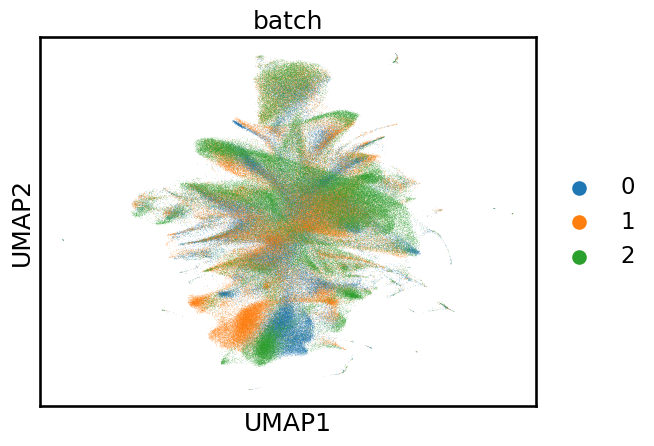

In [11]:
sc.pl.umap(adata,color=["batch"],show=False)

In [13]:
scib.me.ilisi_graph(adata, batch_key="batch", type_="embed", use_rep="X_pca")

0.32010462669230977

## Harmony integration

In [14]:
adata = ad.read_h5ad("/goofys/users/Aleksandra_S/benchmarking_datasets/s1_s_s3_mouse_embryo_concat.h5ad")
sc.pp.normalize_total(adata,target_sum=1e4)
sc.pp.log1p(adata)

In [15]:
sc.tl.pca(adata)
adata.obsm["X_emb"] = harmonize(adata.obsm["X_pca"], adata.obs, batch_key='batch')

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
Reach convergence after 5 iteration(s).


/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'batch'}, xlabel='UMAP1', ylabel='UMAP2'>

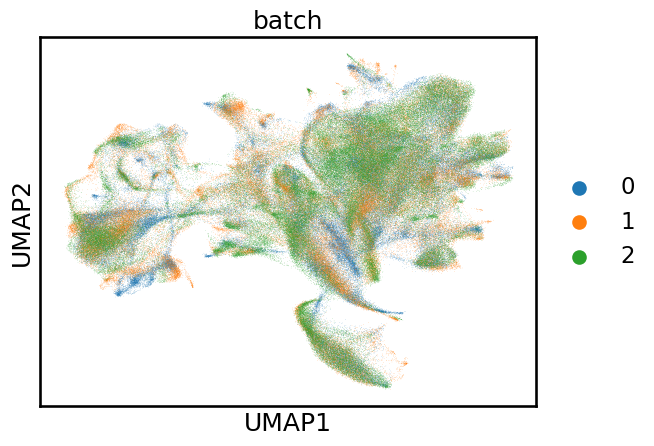

In [16]:
###########################################
sc.pp.neighbors(adata,random_state=0,use_rep="X_emb")
sc.tl.umap(adata)
###########################################

sc.pl.umap(adata,color=["batch"],show=False)
#plt.savefig(save_dir+"scDML_embedding1.png")


In [17]:
scib.me.ilisi_graph(adata, batch_key="batch", type_="embed", use_rep="X_emb")

0.5341540162202825

## Harmony (PCA only)

In [18]:
adata = ad.read_h5ad("/goofys/users/Aleksandra_S/benchmarking_datasets/s1_s_s3_mouse_embryo_concat.h5ad")

In [19]:
sc.tl.pca(adata)
adata.obsm["X_emb"] = harmonize(adata.obsm["X_pca"], adata.obs, batch_key='batch')

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
Reach convergence after 5 iteration(s).


/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'batch'}, xlabel='UMAP1', ylabel='UMAP2'>

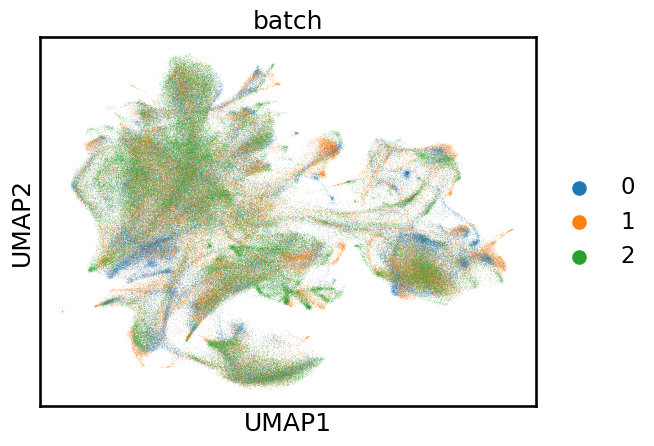

In [20]:
###########################################
sc.pp.neighbors(adata,random_state=0,use_rep="X_emb")
sc.tl.umap(adata)
###########################################

sc.pl.umap(adata,color=["batch"],show=False)
#plt.savefig(save_dir+"scDML_embedding1.png")


In [21]:
scib.me.ilisi_graph(adata, batch_key="batch", type_="embed", use_rep="X_emb")

0.5211189188236536